In [5]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('indian_liver_patient.csv')

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
avg_AGR = df["Albumin_and_Globulin_Ratio"].astype("float").mean(axis=0)
df["Albumin_and_Globulin_Ratio"].replace(np.nan, avg_AGR, inplace =True)

In [9]:
df.shape

(583, 11)

In [10]:
X = df.drop('Dataset', axis=1).copy()

X.head(7)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00


In [11]:
X= pd.get_dummies(X, columns=['Gender'])

X.shape

(583, 11)

In [12]:
y=df['Dataset'].copy()

y.shape

(583,)

In [13]:
from sklearn.preprocessing import scale

In [14]:
X_scaled=scale(X)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42)

In [17]:
from sklearn.svm import SVC

In [18]:
clf1_svm =SVC(kernel='linear', random_state=0)
clf1_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
predict=clf1_svm.predict(X_test)
accuracy_score(y_test, predict)

0.7465753424657534

In [21]:
from sklearn.metrics import plot_confusion_matrix

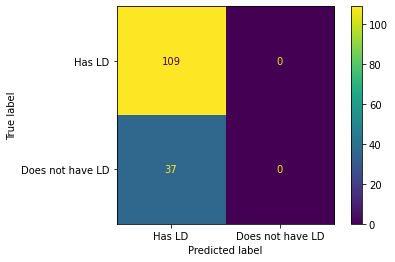

In [22]:
plot_confusion_matrix(clf1_svm, X_test,y_test, display_labels=['Has LD','Does not have LD'])

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.75      1.00      0.85       109
           2       0.00      0.00      0.00        37

    accuracy                           0.75       146
   macro avg       0.37      0.50      0.43       146
weighted avg       0.56      0.75      0.64       146



C:\Users\RANGSUO\anaconda3\envs\TS\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>With Synthetic Minority Oversampling Technique (SMOTE)</h1>

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [27]:
clf1_svm =SVC(kernel='linear', random_state=0)
clf1_svm.fit(X_train_res,y_train_res)

SVC(kernel='linear', random_state=0)

In [28]:
predict=clf1_svm.predict(X_test)
accuracy_score(y_test, predict)

0.6027397260273972

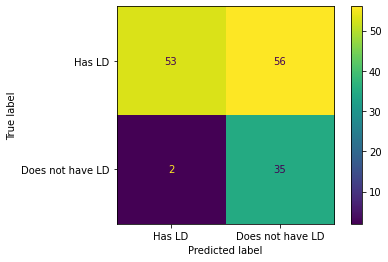

In [29]:
plot_confusion_matrix(clf1_svm, X_test,y_test, display_labels=['Has LD','Does not have LD'])

In [30]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.96      0.49      0.65       109
           2       0.38      0.95      0.55        37

    accuracy                           0.60       146
   macro avg       0.67      0.72      0.60       146
weighted avg       0.82      0.60      0.62       146

